<a href="https://colab.research.google.com/github/hzhang0110/hzhang_ML_Projects/blob/main/XGBoost_Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
#Load packages
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import random



In [276]:
#load input data
df = pd.read_csv('/content/drive/MyDrive/machine_learning_files/The_Cancer_data_1500_V2.csv')

df



,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [277]:
df['Diagnosis'].value_counts()

Diagnosis
0    943
1    557
Name: count, dtype: int64

In [278]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [279]:
#data looks clean, split train test and validation.
#train: 60% test: 20% validation: 20%

X = df.iloc[:,0:8]
y = df[['Diagnosis']]
N = len(df)

In [280]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size= int(N*0.4), stratify=y, random_state = 123)
trainX.shape, testX.shape, trainY.shape, testY.shape

((900, 8), (600, 8), (900, 1), (600, 1))

In [281]:
#Test now has 40%. Split half to use as validation
testX, valX, testY, valY = train_test_split(testX, testY, test_size=0.5, stratify=testY, random_state= 123)
testX.shape, testY.shape, valX.shape, valY.shape

((300, 8), (300, 1), (300, 8), (300, 1))

In [282]:
testX, testY

(      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
 1442   52       0  19.481390        0            0          1.093559   
 258    71       1  31.534265        0            0          3.761905   
 1361   48       0  22.598563        0            0          5.971166   
 1143   64       1  29.878292        1            0          4.864050   
 1487   32       0  21.907978        0            0          7.012933   
 ...   ...     ...        ...      ...          ...               ...   
 104    42       0  21.577814        1            0          0.503229   
 1252   74       0  34.814878        0            0          1.290364   
 759    38       0  30.426663        0            0          4.263183   
 853    47       0  16.792797        0            2          1.995716   
 1129   80       1  16.452299        1            0          7.704378   
 
       AlcoholIntake  CancerHistory  
 1442       1.260910              0  
 258        3.597300              0  
 1361   

In [283]:
trainY.value_counts(normalize=True), testY.value_counts(normalize=True), valY.value_counts(normalize=True)

(Diagnosis
 0            0.628889
 1            0.371111
 Name: proportion, dtype: float64,
 Diagnosis
 0            0.626667
 1            0.373333
 Name: proportion, dtype: float64,
 Diagnosis
 0            0.63
 1            0.37
 Name: proportion, dtype: float64)

In [284]:
#Train XGBoost
dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX, testY)
dval = xgb.DMatrix(valX, valY)


In [354]:
#Set up tuning parameters
param = {'max_depth': 2,
         'eta': 0.05,
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'tree_method': 'hist',
         'min_child_weight': 7,
         'gamma': 7,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'verbosity': 2}
#param['nthread'] = 4

constraints = (1,1,1,1,1, -1, 1,1)
param['monotone_constraints'] = constraints #set 6th feature to have negative direction to target

In [355]:
#start model traing
evallist = [(dtrain, 'train'), (dtest, 'test')]
num_round = 200

random.seed(123)
bst = xgb.train(param, dtrain, num_round, evallist)


[0]	train-auc:0.73323	test-auc:0.68847
[1]	train-auc:0.79557	test-auc:0.75378
[2]	train-auc:0.86310	test-auc:0.80611
[3]	train-auc:0.90251	test-auc:0.84620
[4]	train-auc:0.89674	test-auc:0.84235
[5]	train-auc:0.89770	test-auc:0.84544
[6]	train-auc:0.89557	test-auc:0.84354
[7]	train-auc:0.89482	test-auc:0.84254
[8]	train-auc:0.89557	test-auc:0.84354
[9]	train-auc:0.89685	test-auc:0.84268
[10]	train-auc:0.89697	test-auc:0.84280
[11]	train-auc:0.90643	test-auc:0.85026
[12]	train-auc:0.90682	test-auc:0.85083
[13]	train-auc:0.90380	test-auc:0.85420
[14]	train-auc:0.91578	test-auc:0.86574
[15]	train-auc:0.92550	test-auc:0.87621
[16]	train-auc:0.92826	test-auc:0.88151
[17]	train-auc:0.92887	test-auc:0.88236
[18]	train-auc:0.92904	test-auc:0.88132
[19]	train-auc:0.92829	test-auc:0.88032
[20]	train-auc:0.93211	test-auc:0.88571
[21]	train-auc:0.93233	test-auc:0.88865
[22]	train-auc:0.93608	test-auc:0.89298
[23]	train-auc:0.93548	test-auc:0.89036
[24]	train-auc:0.93526	test-auc:0.89219
[25]	train

In [287]:
#bst.save_model('initial_train_no_contraint.model')

<Axes: >

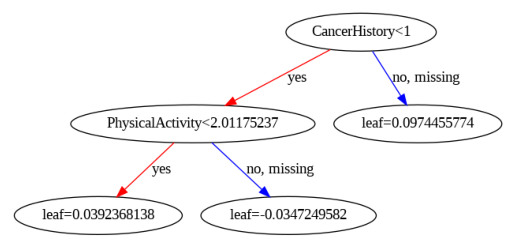

In [356]:
#example of one single tree:

xgb.plot_tree(bst, num_trees=0)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

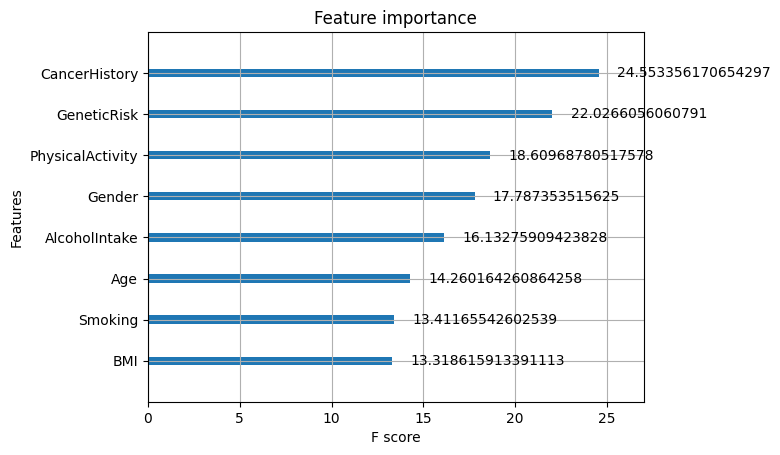

In [357]:
#variable importance
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(bst, importance_type="gain")

In [358]:
#if shap package is not available, use pip install before import
#!pip install -q shap
import shap

#load Tree Shap
explainer = shap.TreeExplainer(bst)
explanation = explainer(trainX)
shap_values = explanation.values

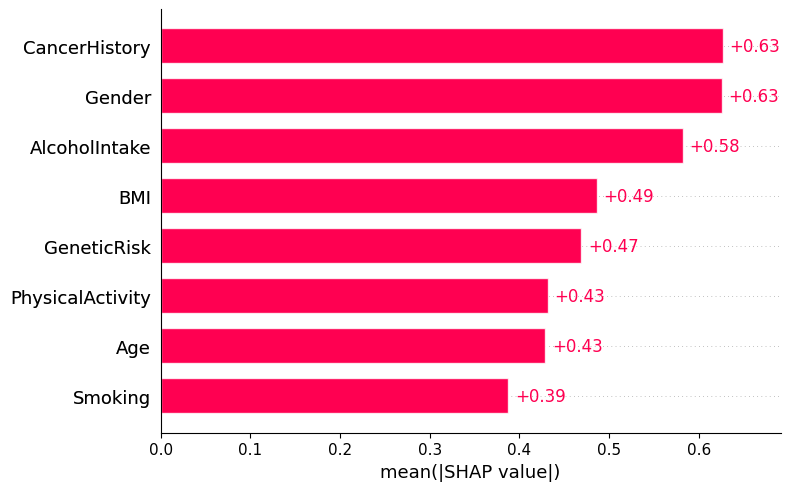

In [359]:
#compare variable importance given by shap vs. gain
shap.plots.bar(explanation)


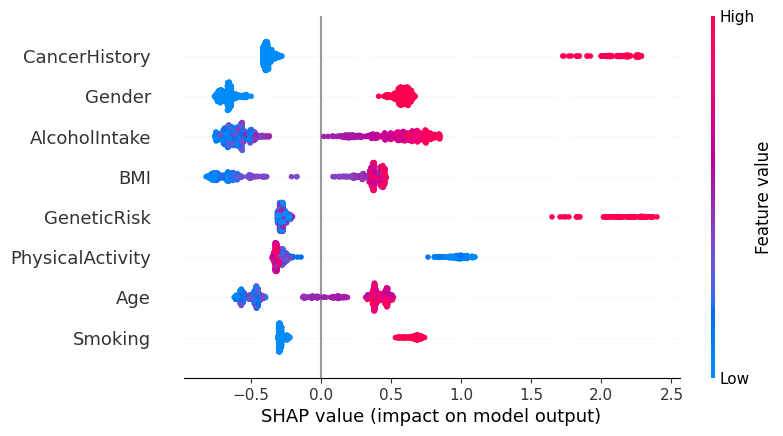

In [360]:
shap.plots.beeswarm(explanation)

#Cancer History: /
#Gender: /
#Alcohol: /
#BMI: /
#Genetic Risk: /
#Age: /
#Physical Activity: \
#Smoking: /

In [361]:
#plot mean shap of Physical Acitivity with output
shap_physical_act = shap_values[:,5].reshape(-1,1)
physical_act_value = trainX['PhysicalActivity'].values.reshape(-1,1)
feature_shap_bind = np.concatenate((physical_act_value, shap_physical_act), axis = 1)

shap_physical_act.shape, physical_act_value.shape, feature_shap_bind.shape

((900, 1), (900, 1), (900, 2))

In [362]:
df_feature_shap = pd.DataFrame(feature_shap_bind)
df_feature_shap.columns =['feature_value', 'shap_contrib']
shap_summary = df_feature_shap.groupby('feature_value',as_index=False)['shap_contrib'].agg(['mean'])
shap_summary

,feature_value,mean
0,0.002410,1.057308
1,0.004015,0.863722
2,0.014283,1.081096
3,0.038303,1.001939
4,0.039184,1.096831
...,...,...
895,9.945643,-0.319373
896,9.954836,-0.318778
897,9.968493,-0.324296
898,9.989047,-0.340637


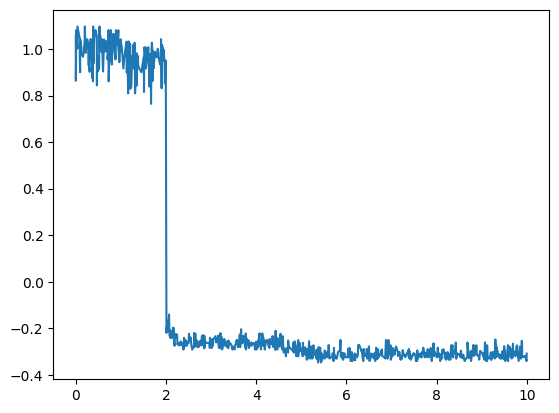

In [363]:
plt.plot(shap_summary['feature_value'], shap_summary['mean'])
#although overall higher physical activity indicates lower chance of cancer, on observation level they have variation.

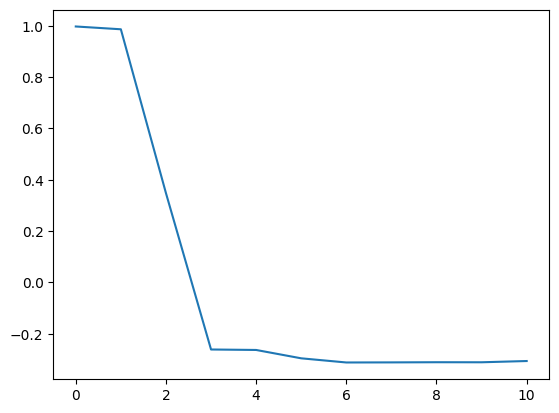

In [364]:
df_feature_shap = pd.DataFrame(feature_shap_bind)
df_feature_shap.columns =['feature_value', 'shap_contrib']
df_feature_shap = df_feature_shap.round({'feature_value': 0})
shap_summary = df_feature_shap.groupby('feature_value',as_index=False)['shap_contrib'].agg(['mean'])
plt.plot(shap_summary['feature_value'], shap_summary['mean'])
#after switching to integer values, the trend looks much smoother.

In [365]:
#Next, check partial dependence of all features
#pdp needs xgb to be trained via sk learn framework

xgb_sk = xgb.XGBClassifier(n_estimators=200, **param)
xgb_sk.fit(trainX, trainY,
           eval_set= [(trainX, trainY), (testX, testY)],
           verbose=10)

[0]	validation_0-auc:0.73323	validation_1-auc:0.68847
[10]	validation_0-auc:0.89697	validation_1-auc:0.84280
[20]	validation_0-auc:0.93211	validation_1-auc:0.88571
[30]	validation_0-auc:0.94878	validation_1-auc:0.90718
[40]	validation_0-auc:0.95492	validation_1-auc:0.91843
[50]	validation_0-auc:0.96005	validation_1-auc:0.92553
[60]	validation_0-auc:0.96503	validation_1-auc:0.93251
[70]	validation_0-auc:0.96703	validation_1-auc:0.93807
[80]	validation_0-auc:0.96739	validation_1-auc:0.93821
[90]	validation_0-auc:0.96870	validation_1-auc:0.93952
[100]	validation_0-auc:0.96945	validation_1-auc:0.94109
[110]	validation_0-auc:0.97068	validation_1-auc:0.94455
[120]	validation_0-auc:0.97101	validation_1-auc:0.94498
[130]	validation_0-auc:0.97183	validation_1-auc:0.94595
[140]	validation_0-auc:0.97205	validation_1-auc:0.94683
[150]	validation_0-auc:0.97237	validation_1-auc:0.94693
[160]	validation_0-auc:0.97227	validation_1-auc:0.94669
[170]	validation_0-auc:0.97243	validation_1-auc:0.94674
[18

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric='auc',
              feature_types=None, gamma=7, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=(1, 1, 1, 1, 1, -1, 1, 1),
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

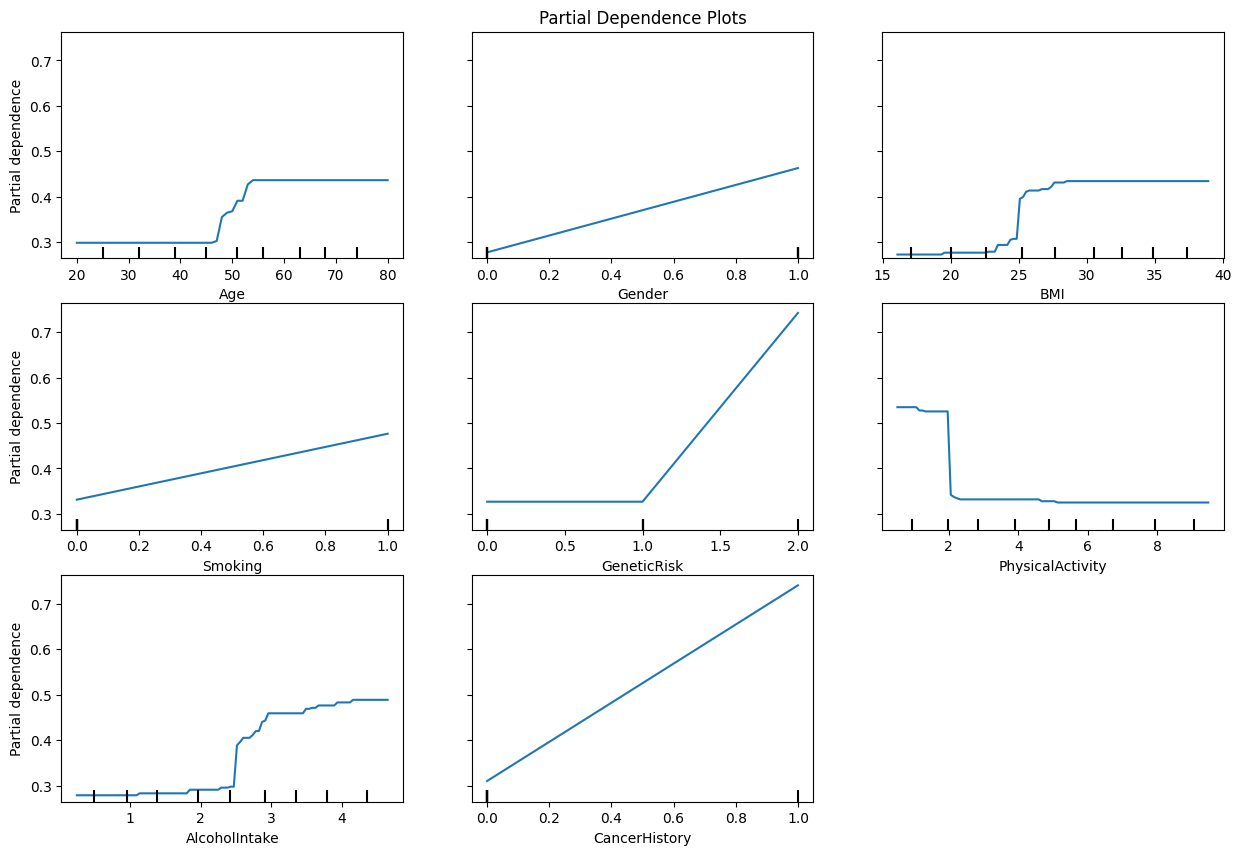

In [366]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=xgb_sk,
    X=trainX,
    features=(0,1,2,3,4,5,6,7), # the features to plot
    random_state=123,
    ax=ax,
)
plt.show()

In [367]:
from pickle import TRUE
#prediction

ypred = bst.predict(dtest)

logit_pred = bst.predict(dtest, output_margin=True)

ypred.mean(), logit_pred.mean()


(0.3601056, -0.81779295)

In [368]:
#write prediction, shapley value

df_ypred = pd.DataFrame(ypred)
df_shap_values = pd.DataFrame(shap_values)

df_ypred.to_csv('pred_probability.csv')
df_shap_values.to_csv('shap.csv')
